<a href="https://colab.research.google.com/github/Mayaraassis/IA/blob/master/Redes_Neurais_Multicamadas_Mayara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#Carregar base de dados
from sklearn import datasets
wine = datasets.load_wine()


In [58]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [59]:
#Fazer validação cruzada
from sklearn.model_selection import train_test_split

X_training, X_testing, y_training, y_testing = train_test_split(
   wine.data[:,:12], wine.target, test_size=0.4
)

In [60]:
#Treinar o modelo
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=0.01,max_iter=2000, hidden_layer_sizes=20,activation='relu')
clf.fit(X_training, y_training)

yp=clf.predict(X_testing)

Matriz de confusão, sem normalizar
[[ 1 12 14]
 [ 0 19  6]
 [ 0 19  1]]
Matriz de confusão normalizada
[[0.03703704 0.44444444 0.51851852]
 [0.         0.76       0.24      ]
 [0.         0.95       0.05      ]]


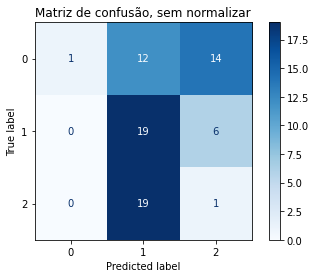

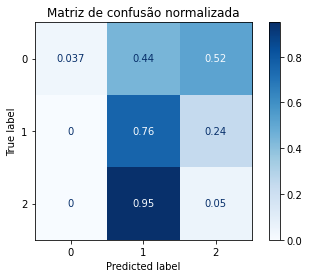

In [61]:
#Analisar o resultados
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_testing, y_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_testing, yp))

              precision    recall  f1-score   support

           0       1.00      0.04      0.07        27
           1       0.38      0.76      0.51        25
           2       0.05      0.05      0.05        20

    accuracy                           0.29        72
   macro avg       0.48      0.28      0.21        72
weighted avg       0.52      0.29      0.22        72



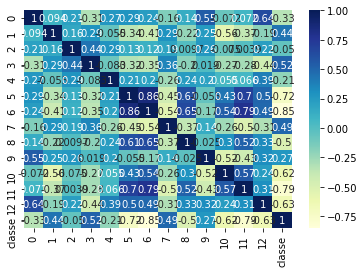

In [63]:
#correlação para tentar melhorar os resultados
import seaborn as sns
import numpy as np
import pandas

tabela = pandas.DataFrame(wine.data)
tabela['classe'] = wine.target
correlacoes = tabela.corr()
sns.heatmap(correlacoes, cmap="YlGnBu", annot = True)

In [64]:
#escolher as duas variaveis mais correlacionadas com a saida
wine_n = np.array(wine.data[:,[5,6,8,9]])
Xn_training, Xn_testing, yn_training, yn_testing = train_test_split(
   wine_n, wine.target, test_size=0.4
)

In [65]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=0.1,max_iter=2000, hidden_layer_sizes=20,activation='relu')
clf.fit(Xn_training, yn_training)

yp=clf.predict(Xn_testing)

Matriz de confusão, sem normalizar
[[26  2  0]
 [ 6 22  1]
 [ 0  1 14]]
Matriz de confusão normalizada
[[0.92857143 0.07142857 0.        ]
 [0.20689655 0.75862069 0.03448276]
 [0.         0.06666667 0.93333333]]


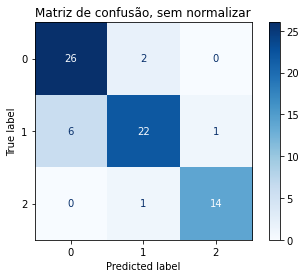

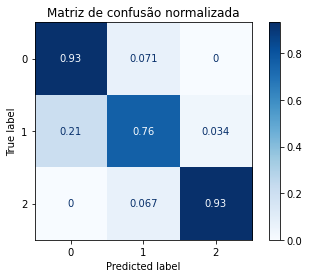

In [66]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, Xn_testing, yn_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**Arvore de decisão**


In [67]:

from sklearn.model_selection import train_test_split

wine_dt = np.array(wine.data[:,[5,6,8,9]])
Xdt_training, Xdt_testing, ydt_training, ydt_testing = train_test_split(
   wine_dt, wine.target, test_size=0.4
)

In [68]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier()

In [69]:
clf_dt = clf_dt.fit(Xdt_training,ydt_training)

In [70]:
dt=clf_dt.predict(Xdt_testing)

Matriz de confusão, sem normalizar
[[14  5  0]
 [ 3 29  0]
 [ 0  3 18]]
Matriz de confusão normalizada
[[0.73684211 0.26315789 0.        ]
 [0.09375    0.90625    0.        ]
 [0.         0.14285714 0.85714286]]


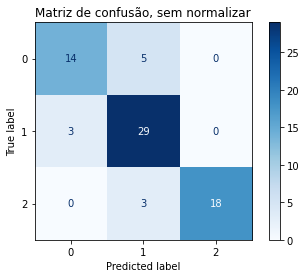

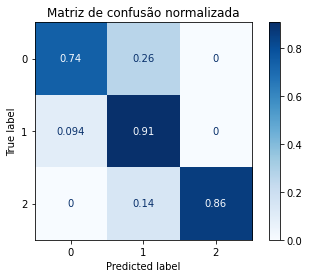

In [71]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_dt, Xdt_testing, ydt_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**KNN**


In [72]:

from sklearn.model_selection import train_test_split

wine_nn = np.array(wine.data[:,[5,6,8,9]])
Xnn_training, Xnn_testing, ynn_training, ynn_testing = train_test_split(
   wine_nn, wine.target, test_size=0.4
)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)


In [74]:
knn.fit(Xnn_training,ynn_training)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [75]:
nn=knn.predict(Xnn_testing)

Matriz de confusão, sem normalizar
[[24  0  0]
 [ 2 22  0]
 [ 0  1 23]]
Matriz de confusão normalizada
[[1.         0.         0.        ]
 [0.08333333 0.91666667 0.        ]
 [0.         0.04166667 0.95833333]]


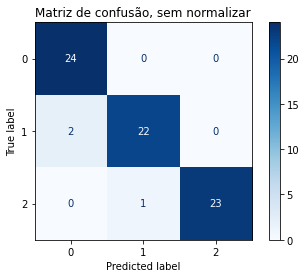

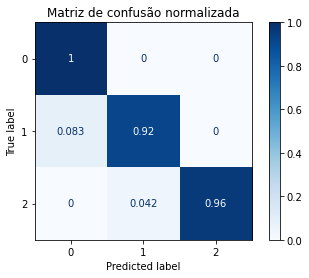

In [76]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, Xnn_testing, ynn_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**K-means**

In [77]:
from sklearn.cluster import KMeans 
import pandas as pd


In [78]:

names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
'Proline']
wineM = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = names)

In [79]:
df=pd.DataFrame(wineM)
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [80]:
print(df.columns.values)

['Class' 'Alcohol' 'Malic acid' 'Ash' 'Alcalinity of ash' 'Magnesium'
 'Total phenols' 'Flavanoids' 'Nonflavanoid phenols' 'Proanthocyanins'
 'Color intensity' 'Hue' 'OD280/OD315' 'Proline']


In [81]:
X=df.drop('Class', axis=1)
X[:10]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [82]:
Y=df.Class
Y.unique()

array([1, 2, 3])

In [83]:

kmeans= KMeans(n_clusters=3, init='random')
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [84]:
kmeans.cluster_centers_

array([[1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

In [85]:
distance=kmeans.fit_transform(X)
distance

array([[ 607.78826656,  131.92263323,  337.51294514],
       [ 591.8986175 ,  145.37982131,  321.80671905],
       [ 726.82863254,   11.28739369,  456.67678488],
       [1021.99705832,  284.96039271,  751.73664914],
       [ 277.95920208,  460.33893101,   16.04009969],
       [ 991.98630372,  254.94342746,  721.73131851],
       [ 831.80393541,   95.36352845,  561.74242799],
       [ 837.26808124,  101.05475563,  566.93704444],
       [ 586.83457297,  150.42534491,  316.79667934],
       [ 586.82965136,  150.34962088,  316.74956333],
       [1051.85277532,  314.8538496 ,  781.66918816],
       [ 821.7853429 ,   85.51018398,  551.74048478],
       [ 861.79162135,  125.94312634,  591.85694157],
       [ 691.84379355,   47.7821734 ,  421.94830482],
       [1088.85729303,  351.91192498,  818.70954344],
       [ 852.01095494,  115.04730434,  581.73380738],
       [ 822.24027662,   86.1355137 ,  551.91041596],
       [ 672.15979227,   65.9146233 ,  401.83157927],
       [1221.88892063,  484.

In [86]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)